<a href="https://colab.research.google.com/github/OmarK920/DataEngineerinM2/blob/main/commit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [8]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

**Reading Datasets**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
df_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


In [11]:
df_airports = pd.read_csv('/content/drive/MyDrive/airports.csv')


In [12]:
df_airlines = pd.read_csv('/content/drive/MyDrive/airlines.csv')


In [13]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [14]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [16]:
#################################################################

**Data Integration**

In [17]:
#merge to df_airlines,df_flights datasets
df_demo3 = pd.merge(df_airlines,df_flights, left_on="IATA_CODE", right_on="AIRLINE")

In [18]:
df_demo3.head(2)

,IATA_CODE,AIRLINE_x,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_y,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,UA,United Air Lines Inc.,2015,1,1,4,UA,1197,N78448,SFO,...,619.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,UA,United Air Lines Inc.,2015,1,1,4,UA,1545,N76517,LAX,...,607.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_demo3.columns

Index(['IATA_CODE', 'AIRLINE_x', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_y', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [20]:
#
main_df = pd.merge(df_airports, df_demo3, left_on="IATA_CODE", right_on="DESTINATION_AIRPORT")

In [21]:
main_df.head(2)

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,1612.0,51.0,0,0,NaN,0.0,0.0,51.0,0.0,0.0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,1532.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [22]:
main_df.isnull().sum() 

IATA_CODE_x                  0
AIRPORT                      0
CITY                         0
STATE                        0
COUNTRY                      0
LATITUDE                  4610
LONGITUDE                 4610
IATA_CODE_y                  0
AIRLINE_x                    0
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_y                    0
FLIGHT_NUMBER                0
TAIL_NUMBER              14367
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           83814
DEPARTURE_DELAY          83814
TAXI_OUT                 86612
WHEELS_OFF               86612
SCHEDULED_TIME               6
ELAPSED_TIME            101784
AIR_TIME                101784
DISTANCE                     0
WHEELS_ON                89942
TAXI_IN                  89942
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             89942
ARRIVAL_DELAY           101784
DIVERTED

In [23]:
#here we are going to drop unecessary columns and columns which have many missing values

main_df.drop('TAIL_NUMBER' , axis = 1 , inplace = True)
main_df.drop('DEPARTURE_TIME' , axis = 1 , inplace = True)
main_df.drop('DEPARTURE_DELAY' , axis = 1 , inplace = True)
main_df.drop('TAXI_OUT' , axis = 1 , inplace = True)
main_df.drop('WHEELS_OFF' , axis = 1 , inplace = True)
main_df.drop('ELAPSED_TIME' , axis = 1 , inplace = True)
main_df.drop('AIR_TIME' , axis = 1 , inplace = True)
main_df.drop('WHEELS_ON' , axis = 1 , inplace = True)
main_df.drop('TAXI_IN' , axis = 1 , inplace = True)
main_df.drop('ARRIVAL_TIME' , axis = 1 , inplace = True)
main_df.drop('ARRIVAL_DELAY' , axis = 1 , inplace = True)
main_df.drop('CANCELLATION_REASON' , axis = 1 , inplace = True)
main_df.drop('AIR_SYSTEM_DELAY' , axis = 1 , inplace = True)
main_df.drop('SECURITY_DELAY' , axis = 1 , inplace = True)
main_df.drop('AIRLINE_DELAY' , axis = 1 , inplace = True)
main_df.drop('LATE_AIRCRAFT_DELAY' , axis = 1 , inplace = True)
main_df.drop('WEATHER_DELAY' , axis = 1 , inplace = True)



In [24]:
main_df.isnull().sum()

IATA_CODE_x               0
AIRPORT                   0
CITY                      0
STATE                     0
COUNTRY                   0
LATITUDE               4610
LONGITUDE              4610
IATA_CODE_y               0
AIRLINE_x                 0
YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE_y                 0
FLIGHT_NUMBER             0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            6
DISTANCE                  0
SCHEDULED_ARRIVAL         0
DIVERTED                  0
CANCELLED                 0
dtype: int64

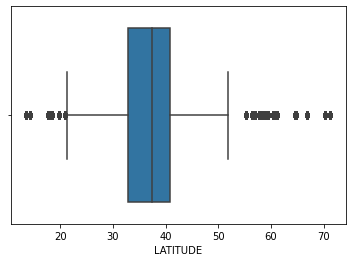

In [25]:
#Detecting and Removing Outliers
#box-plot before removing outliers
sns.boxplot(x=main_df['LATITUDE'])

In [26]:
Q1 = main_df['LATITUDE'].quantile(0.25)
Q3 = main_df['LATITUDE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7.892440000000001


In [27]:
arr_1 = main_df['LATITUDE'] < (Q1 - 1.5 * IQR)
arr_2 = main_df['LATITUDE'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [28]:
print("No. of outliers: ", mask.sum())

No. of outliers:  103151


In [29]:
#Removing the outliers
main_df = main_df[~(mask)]
main_df.head()

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,AIRLINE_y,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
3,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
4,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0


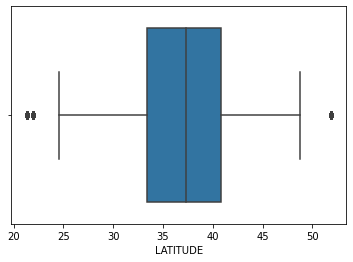

In [30]:
#box-plot after removing outliers
sns.boxplot(x=main_df['LATITUDE'])

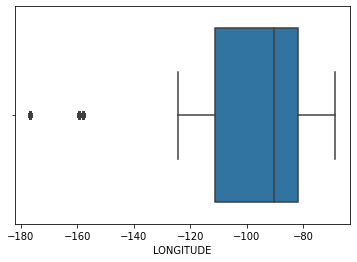

In [31]:
sns.boxplot(x=main_df['LONGITUDE'])

In [32]:
Q1 = main_df['LONGITUDE'].quantile(0.25)
Q3 = main_df['LONGITUDE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29.429779999999994


In [33]:
arr_1 = main_df['LONGITUDE'] < (Q1 - 1.5 * IQR)
arr_2 = main_df['LONGITUDE'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [34]:
print("No. of outliers: ", mask.sum())

No. of outliers:  53798


In [35]:
#Removing the outliers
main_df = main_df[~(mask)]
main_df.head()

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,AIRLINE_y,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
3,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
4,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0


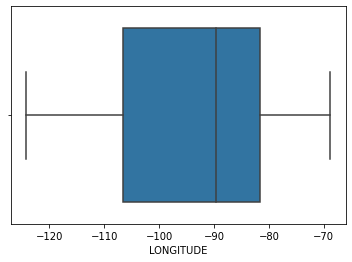

In [36]:
#box-plot after removing outliers
sns.boxplot(x=main_df['LONGITUDE'])

In [37]:
#fill the missing values for numerical terms - mean(Continous Variables) - after removing outliers
main_df['LONGITUDE'] = main_df['LONGITUDE'].fillna(main_df['LONGITUDE'].mean())
main_df['LATITUDE'] = main_df['LATITUDE'].fillna(main_df['LATITUDE'].mean())


In [38]:
main_df.isnull().sum()

IATA_CODE_x            0
AIRPORT                0
CITY                   0
STATE                  0
COUNTRY                0
LATITUDE               0
LONGITUDE              0
IATA_CODE_y            0
AIRLINE_x              0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE_y              0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         6
DISTANCE               0
SCHEDULED_ARRIVAL      0
DIVERTED               0
CANCELLED              0
dtype: int64

**Feature Engineering**

In [39]:
main_df.head(3)


,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,AIRLINE_y,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0


In [41]:
df_main_demo2 = main_df 

In [42]:
#Newley Created Feature 'DATE' that will be calculated using the features 'YEAR','MONTH', 'DAY'
df_main_demo2['DATE'] = pd.to_datetime(df_main_demo2[['YEAR','MONTH', 'DAY']])


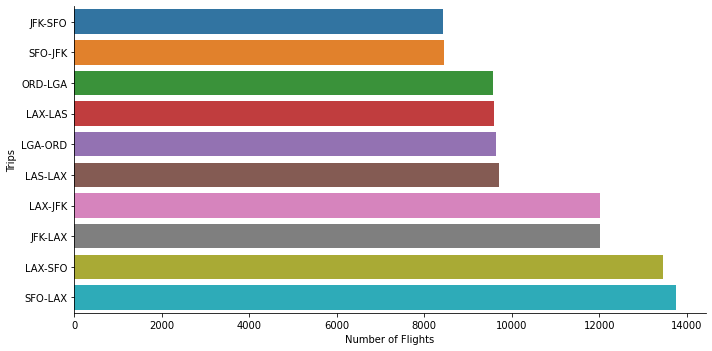

In [44]:
#here this features helps me calculate the passenger footstep in each given airport 
air_trips = df_main_demo2.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], as_index=False)['FLIGHT_NUMBER'].count()
air_trips.sort_values(by='FLIGHT_NUMBER',inplace=True, ignore_index=True)

air_trips['Trips'] = air_trips.apply(lambda x: str(x['ORIGIN_AIRPORT'])+'-'+str(x['DESTINATION_AIRPORT']),axis=1)
sns.catplot(y='Trips', x='FLIGHT_NUMBER', kind='bar', 
            data=air_trips.iloc[-10:,:], 
            aspect=2)
plt.xlabel('Number of Flights')
plt.ylabel('Trips')
plt.show()

In [46]:
df_main_demo2.head(1)

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,DATE,HOUR
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,DTW,ABE,1355,86.0,425,1521,0,0,2015-03-02,13


In [45]:
#here i created a new feature (hour) that will help me calculate the number of flights per hour
#as demonstrated in the visualization below
#this new feature was created to answer the question of ( What are the hours of the days that have the most flights)

df_main_demo2['HOUR']=(df_main_demo2.SCHEDULED_DEPARTURE/100).astype(int)


[]

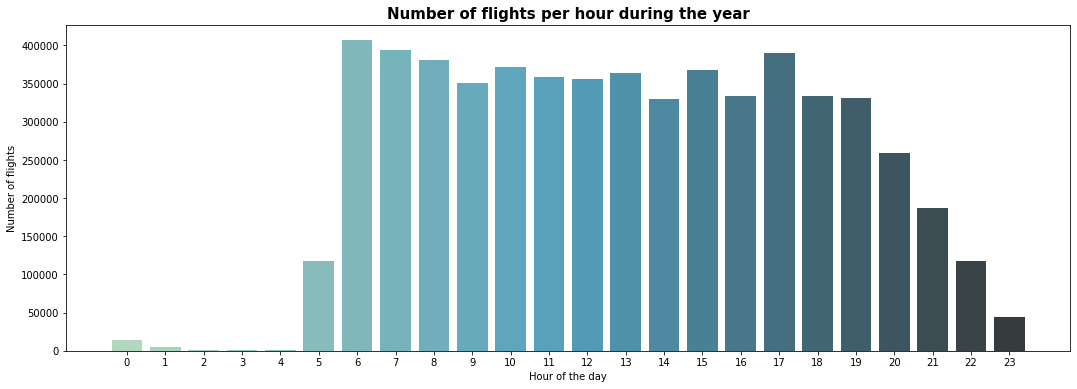

In [47]:
#The bar plot, clearly shows how, regardless of the month, 
#the number of flights drops down at night 
#and it reaches is maximim values between 6 and 7 AM, 
#with other two small peaks between 15 and 16, and 17 and 18.

pddf=pd.DataFrame({'count' : df_flights.groupby(((df_flights.SCHEDULED_DEPARTURE/100).astype(int))).size()}).reset_index()

# plot the number of flights per hour
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="SCHEDULED_DEPARTURE",
            y="count",
            data=pddf,
            palette=sns.color_palette("GnBu_d", 24),
            ax=ax)

# set plot's labels
ax.set(xlabel='Hour of the day', ylabel='Number of flights')
ax.set_title("Number of flights per hour during the year", fontweight="bold", size=15)

plt.plot()

**Visualizations**

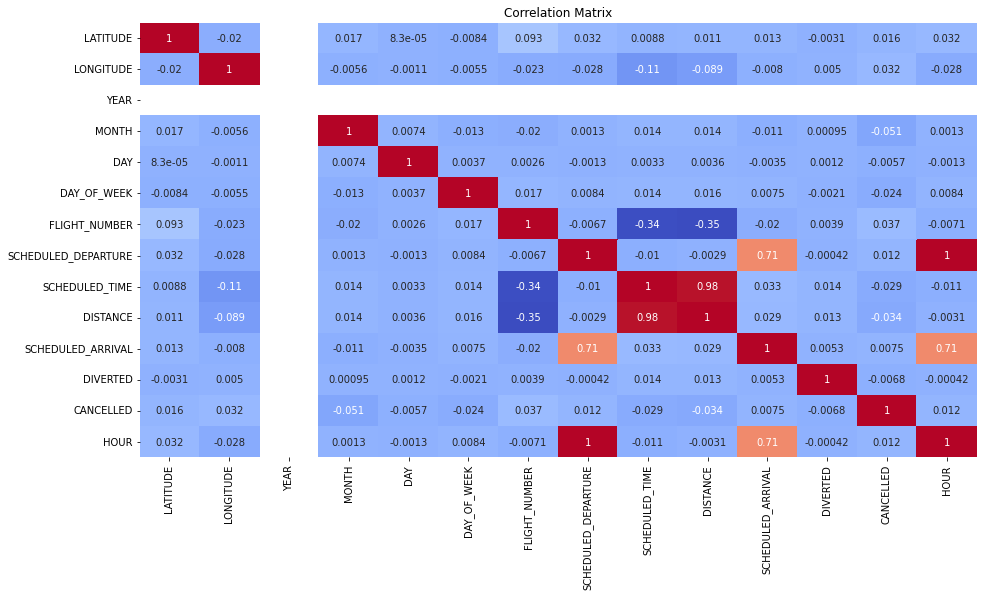

In [48]:
#correlation matrix to show the correlation between featurs
corr_matrix = main_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cbar=False , cmap = 'coolwarm' )
plt.title("Correlation Matrix")
plt.show()

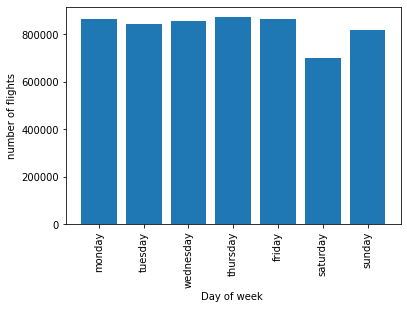

In [43]:
#this visualization shows us the number of flights during the days of the week through out the year
days=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
n_flight_week=list(df_flights.groupby('DAY_OF_WEEK').count().YEAR)
frequencies=[n_flight_week[i] for i in range(len(n_flight_week)) ]
plt.bar(range(0,7),frequencies)
plt.xlabel('Day of week ')
plt.ylabel('number of flights')
plt.xticks(range(0,7),days,rotation='vertical')
plt.show()

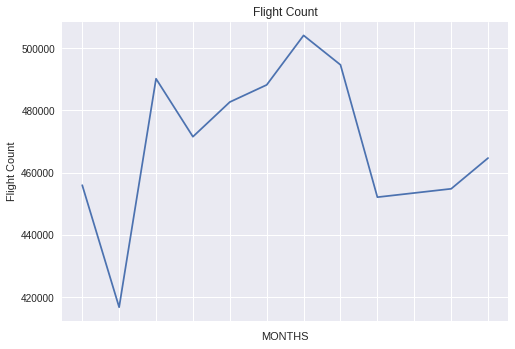

In [49]:
#Here iam exploring how the number of flights changer during the months of the year

datedf = df_main_demo2.loc[(df_main_demo2['DATE'] > '2015-12-20') & (df_main_demo2['DATE'] < '2015-12-20')]

plt.style.use('seaborn')
labels = datedf['DATE']
main_df.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("MONTHS")
plt.xticks(labels=labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title('Flight Count')
plt.show()